In [1]:
from google.colab import drive
import os

drive.mount("/content/drive")
os.chdir("/content/drive/My Drive/Colab Notebooks/thptqg-2025")

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("bang_diem_sau_tien_xu_li.csv")
df.head()

Unnamed: 0  Toán   Văn Mã môn ngoại ngữ Môn phụ  Điểm môn phụ  Mã sở  \
0           0  5.75  7.75              NaN     Hóa          7.75      1   
1           1  5.75  7.75              NaN    Sinh          8.25      1   
2           2  8.00  8.25              NaN      Lí          8.50      1   
3           3  8.00  8.25              NaN     Hóa          6.75      1   
4           4  6.75  8.50              NaN      Lí          8.75      1   

   Số thứ tự tỉnh  
0               1  
1               1  
2               2  
3               2  
4               3

In [24]:
df["Số báo danh"] = df["Mã sở"] * 1000000 + df["Số thứ tự tỉnh"]

In [25]:
df_chinh = df.drop_duplicates(subset="Số báo danh")

toan = df_chinh["Toán"]
van = df_chinh["Văn"]

In [26]:
list_mon_phu = [mon for mon in df["Môn phụ"].unique() if pd.notna(mon) and mon != "Ngoại ngữ"]
mon_phu = {mon : df[df["Môn phụ"] == mon]["Điểm môn phụ"] for mon in list_mon_phu}

In [27]:
list_ngoai_ngu = [nhom for nhom in df["Mã môn ngoại ngữ"].unique() if pd.notna(nhom)]

bang_quy_doi = {
    "N1" : "Tiếng Anh",
    "N2" : "Tiếng Nga",
    "N3" : "Tiếng Pháp",
    "N4" : "Tiếng Trung",
    "N5" : "Tiếng Đức",
    "N6" : "Tiếng Nhật",
    "N7" : "Tiếng Hàn"
}

ngoai_ngu = {bang_quy_doi[nhom] : df[df["Mã môn ngoại ngữ"] == nhom]["Điểm môn phụ"] for nhom in list_ngoai_ngu}

In [28]:
score = {
    "Toán" : toan,
    "Văn" : van,
    **mon_phu,
    **ngoai_ngu
}

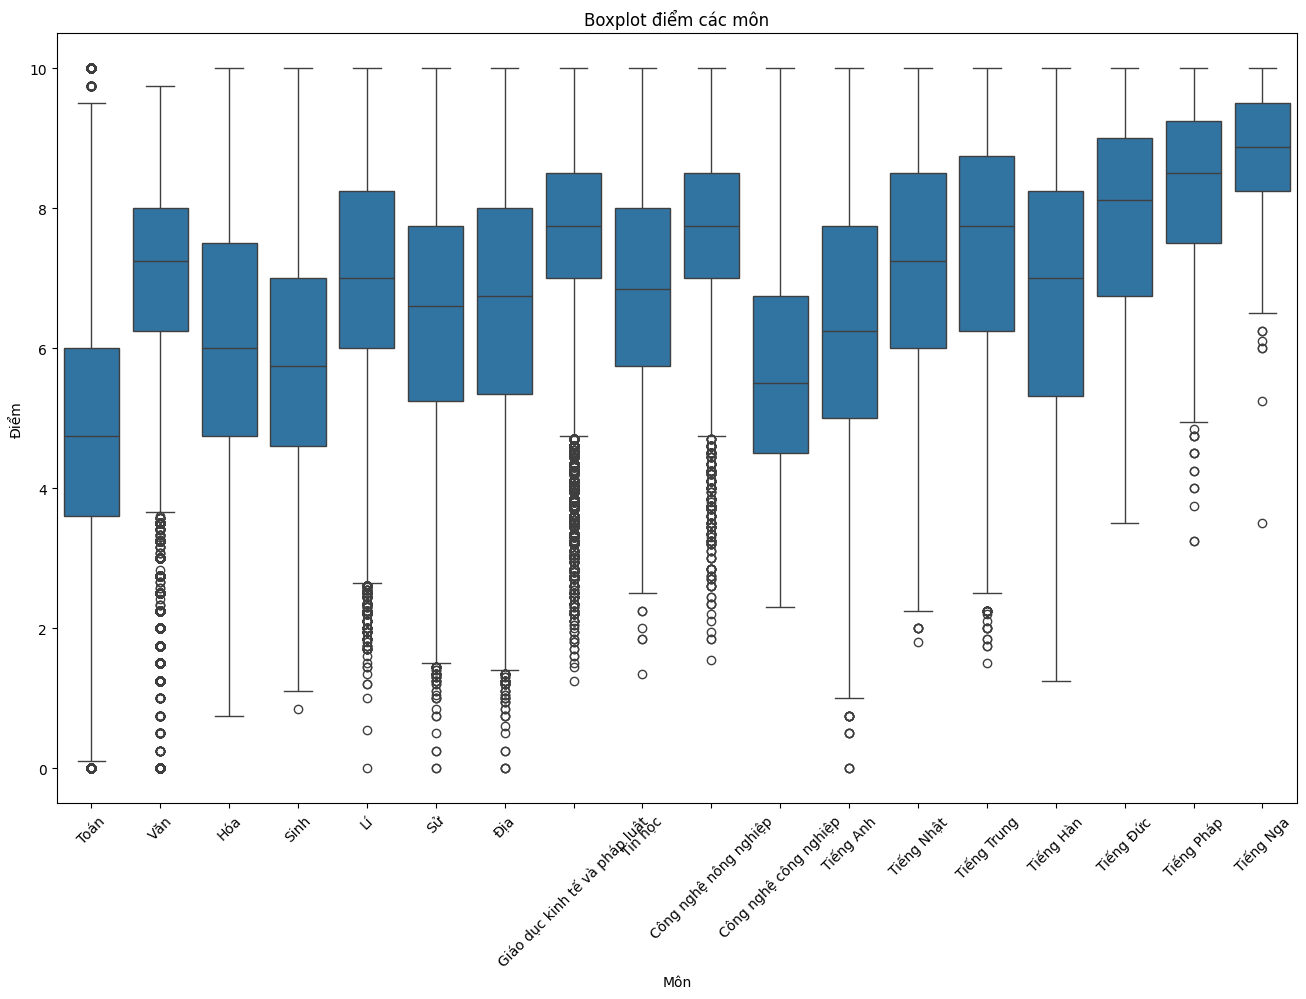

In [29]:
## Biểu đồ heatmap cho tất cả các môn
import seaborn as sns

df_long = pd.concat([
    pd.DataFrame({"Môn": mon, "Điểm": s})
    for mon, s in score.items()
], ignore_index=True)


plt.figure(figsize=(16,10))
sns.boxplot(x="Môn", y="Điểm", data=df_long)
plt.xticks(rotation=45)
plt.title("Boxplot điểm các môn")
plt.show()

In [30]:
df_long.groupby("Môn").describe()

Điểm                                   \
                                   count      mean       std   min    25%   
Môn                                                                         
Công nghệ công nghiệp             1939.0  5.678804  1.513286  2.30  4.500   
Công nghệ nông nghiệp            18231.0  7.674659  1.188451  1.55  7.000   
Giáo dục kinh tế và pháp luật   214574.0  7.696897  1.183918  1.25  7.000   
Hóa                             209552.0  6.117026  1.815658  0.75  4.750   
Lí                              309882.0  7.024686  1.518879  0.00  6.000   
Sinh                             56730.0  5.810411  1.613341  0.85  4.600   
Sử                              421604.0  6.524415  1.643521  0.00  5.250   
Tin học                           6057.0  6.824847  1.495923  1.35  5.750   
Tiếng Anh                       647413.0  6.375957  1.746931  0.00  5.000   
Tiếng Hàn                         1052.0  6.699905  1.875267  1.25  5.325   
Tiếng Nga                          120.0  8.598333  1.193803  3.50  8.250   
Tiếng Nhật                         972.0  6.983796  1.869545  1.80  6.000   
Tiếng Pháp                         774.0  8.189083  1.322064  3.25  7.500   
Tiếng Trung                       8181.0  7.415267  1.746381  1.50  6.250   
Tiếng Đức                          300.0  7.759500  1.526976  3.50  6.750   
Toán                           1000000.0  4.816172  1.722145  0.00  3.600   
Văn                            1000000.0  6.982367  1.363090  0.00  6.250   
Địa                             421004.0  6.629437  1.762820  0.00  5.350   

                                                   
                                 50%   75%    max  
Môn                                                
Công nghệ công nghiệp          5.500  6.75  10.00  
Công nghệ nông nghiệp          7.750  8.50  10.00  
Giáo dục kinh tế và pháp luật  7.750  8.50  10.00  
Hóa                            6.000  7.50  10.00  
Lí                             7.000  8.25  10.00  
Sinh                           5.750  7.00  10.00  
Sử                             6.600  7.75  10.00  
Tin học                        6.850  8.00  10.00  
Tiếng Anh                      6.250  7.75  10.00  
Tiếng Hàn                      7.000  8.25  10.00  
Tiếng Nga                      8.875  9.50  10.00  
Tiếng Nhật                     7.250  8.50  10.00  
Tiếng Pháp                     8.500  9.25  10.00  
Tiếng Trung                    7.750  8.75  10.00  
Tiếng Đức                      8.125  9.00  10.00  
Toán                           4.750  6.00  10.00  
Văn                            7.250  8.00   9.75  
Địa                            6.750  8.00  10.00

## Đề xuất 1: Thí sinh phải thi tất cả các môn thi để xét tốt nghiệp

- Giải thích: Số lượng thí sinh thi ở từng môn rất chênh lệch, dẫn đến hệ quả là môn có nhiều thí sinh thi thì phổ điểm thấp, trong khi môn ít thí sinh thi thì phổ điểm cao, nên không thể đánh giá được mức độ phù hợp của đề thi.

## Đề xuất 2: Nên để nguyên độ khó đề thi môn Toán, hoặc nâng cao độ khó nếu cần

- Giải thích:

    - Vì tất cả thí sinh đều phải làm bài thi Toán, nên phổ điểm tin cậy hơn

    - Phổ điểm môn Toán có dạng tương tự phân phối chuẩn, cho thấy cách ra đề năm nay có một sự tinh tế nhất định, để tránh học sinh bị hiểu sai về năng lực thực tế

## Đề xuất 3: Nên nâng cao độ khó đề thi môn Ngữ văn

- Giải thích:

    - Tương tự môn toán, tất cả thí sinh đều phải làm bài thi môn Ngữ văn

    - Một phần là do đánh giá chủ quan từ các giáo viên, nên dễ bị thiên lệch điểm số

    - Một phần khác là đề dễ tiếp cận, nên ít tạo ra sự phân loại rõ ràng như môn Toán

    - Hệ quả là phổ điểm bị lệch phải rất mạnh